In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_excel('Data analyst Data.xlsx')
df.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Events                                                           4894 non-null   object 
 4   Attendee Status                                                  4894 non-null   object 
 5   College Name                                                     4879 non-null   object 
 6   How did you come to know about this event?                       2678 non-null   object 
 7   Specify in "Others" (how did you come to k

In [4]:
# Handle missing values
df['College Name'].fillna('Unknown', inplace=True)
df['How did you come to know about this event?'].fillna('Unknown', inplace=True)
df['Specify in "Others" (how did you come to know about this event)'].fillna('Not Specified', inplace=True)

In [5]:
# Convert to title case to standardize them to a common format
df['College Name'] = df['College Name'].str.title()

# 1. How many unique students are included in the dataset?

In [81]:
unique_students = df['Email ID'].nunique()
print(f"\033[1m - Unique students: {unique_students}")

 - Unique students: 2157


# 2. What is the average CGPA of the students?

In [82]:
average_cgpa = df['CGPA'].mean()
print(f"\033[1m - Average CGPA: {average_cgpa:.2f}")

 - Average CGPA: 8.04


# 3. What is the distribution of students across different graduation years?

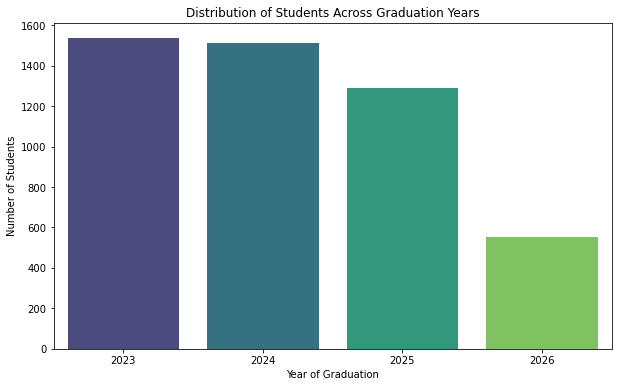

In [8]:
# Get the distribution of students across graduation years
graduation_year_distribution = df['Year of Graduation'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=graduation_year_distribution.index, y=graduation_year_distribution.values, data=df, palette="viridis")
plt.title('Distribution of Students Across Graduation Years')
plt.xlabel('Year of Graduation')
plt.ylabel('Number of Students')
plt.show()


### - Number of Students graduated is highest in 2023 and lowest in 2026

# 4. What is the distribution of students' experience with Python programming?

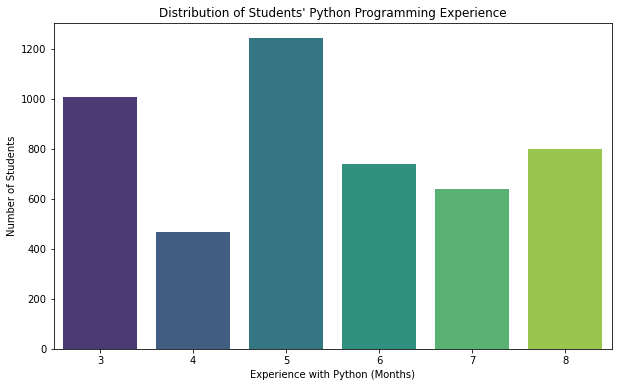

In [9]:
# Get the distribution of students' Python programming experience
python_exp_distribution = df['Experience with python (Months)'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=python_exp_distribution.index, y=python_exp_distribution.values, data=df, palette="viridis")
plt.title("Distribution of Students' Python Programming Experience")
plt.xlabel('Experience with Python (Months)')
plt.ylabel('Number of Students')
plt.show()

### - Majority of Students have 5 months of experience in python

# 5. What is the average family income of the student?

In [10]:
# Define a mapping for family income ranges to their average values in lakhs
income_mapping = {
    '0-2 Lakh': 1,
    '2-5 Lakh': 3.5,
    '5-7 Lakh': 6,
    '7 Lakh+': 7.5  # Assuming 7.5 as a representative value for "7 Lakh+"
}
# Convert the Family Income column using the mapping
df['Family Income (Lakh)'] = df['Family Income'].map(income_mapping)

In [83]:
average_family_income = df['Family Income (Lakh)'].mean()
print(f"\033[1m - Average family income: {average_family_income:.2f} Lakh")

 - Average family income: 1.30 Lakh


# 6. How does the CGPA vary among different colleges? (Show top 5 results only)

In [12]:
college_cgpa = df.groupby('College Name')['CGPA'].mean().sort_values(ascending=False).head(5).reset_index()
print("CGPA variation among different colleges (top 5):")
print(college_cgpa)

CGPA variation among different colleges (top 5):
                                        College Name      CGPA
0                               St Xavier'S College   8.202410
1  Thakur Institute Of Management Studies, Career...  8.167089
2                   Ap Shah Institute Of Technology   8.161538
3  B. K. Birla College Of Arts, Science & Commerc...  8.155918
4        Vidyalankar Institute Of Technology, Mumbai  8.119741


### - Average CGPA for the top 5 colleges are around 8 with highest being 8.20 from St Xavier's College

# 7. Are there any outliers in the quantity (number of courses completed) attribute?

In [14]:
quantity_outliers = df['Quantity'].describe()
print(quantity_outliers)

count    4894.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Quantity, dtype: float64


### - There are no outliers

# 8. What is the average CGPA for students from each city?

In [15]:
average_cgpa_city = df.groupby('City')['CGPA'].mean().sort_values(ascending=False).reset_index()
pd.set_option('display.max_rows', None)
print("Average CGPA for students from each city:")
print(average_cgpa_city)

Average CGPA for students from each city:
            City      CGPA
0       Kolhapur  8.557143
1         Raipur  8.507143
2        Sonipat  8.464286
3       Gurugram  8.459259
4           Puri  8.450000
5          Siwan  8.450000
6       Srinagar  8.435714
7          Delhi  8.414286
8           Pune  8.400000
9          Hasan  8.392857
10     Darbhanga  8.357143
11      Buldhana  8.352941
12       Jhalwar  8.348077
13      Nizambad  8.342857
14      Guwahati  8.336364
15        Wardha  8.328571
16         Panji  8.321429
17        Munger  8.307143
18        Narwar  8.300000
19        Budaun  8.292857
20         Malda  8.289286
21        Jaipur  8.288462
22         Ajmer  8.284314
23   Muzaffarpur  8.278571
24         Jammu  8.278571
25         Hugli  8.275000
26        Burani  8.268182
27          Jind  8.262963
28    Aurangabad  8.258824
29         Punch  8.257143
30      Varanasi  8.253571
31           Una  8.250000
32       Gangtok  8.250000
33         Sagar  8.245238
34      Haiji

### - The resulted data shows average CGPA for students from each city with highest from Kolhapur having 8.55  and lowest from New Delhi having 7.30

# 9. Can we identify any relationship between family income and CGPA?

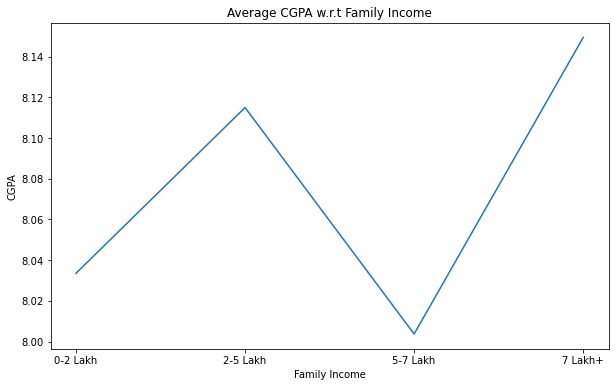

In [29]:
family_income_vs_cgpa = df.groupby('Family Income')['CGPA'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.lineplot(x=family_income_vs_cgpa['Family Income'], y=family_income_vs_cgpa['CGPA'], data=df, palette="viridis")
plt.title("Average CGPA w.r.t Family Income")
plt.xlabel('Family Income')
plt.ylabel('CGPA')
plt.show()

### - The relationship between family income and CGPA is not linear, as evidenced by the fluctuations in the average CGPA across different income ranges. While lower and higher income brackets show higher CGPAs, the middle income bracket (5-7 Lakh) shows a lower CGPA.

# 10. How many students from various cities? (Solve using data visualization tool)

In [31]:
city_distribution = df['City'].value_counts().reset_index()
pd.set_option('display.max_rows', None)
print("Number of Students from Various Cities:")
print(city_distribution)

Number of Students from Various Cities:
           index  City
0     Chandigarh    57
1          Siuri    56
2         Talmuk    56
3          Gonda    56
4          Sikar    52
5           Kota    52
6        Bikaner    52
7         Jaipur    52
8        Jhalwar    52
9        Jodhpur    52
10     Ahemdabad    52
11         Jalor    52
12          Pali    52
13        Amreli    52
14        Dwarka    52
15       Patiala    51
16        Barmer    51
17          Amer    51
18         Ajmer    51
19       Sangrur    51
20       Jalgaon    51
21      Amritsar    51
22      Buldhana    51
23    Aurangabad    51
24          Mahe    51
25      Bhandara    51
26       Bhsawal    51
27           Bid    51
28         Dhule    51
29        Kalyan    51
30         Thane    51
31   Navi Mumbai    51
32        Mumbai    51
33        Nagpur    51
34        Nanded    51
35        Godhra    50
36       Navsari    44
37        Valsad    44
38         Surat    44
39         Morbi    44
40         Kheda 

### - The resulted data shows distribution of students across cities with highest from Chandigarh and lowest from Amravati

# 11. How does the expected salary vary based on factors like 'GPA', 'Family Income', 'Experience with python (Months)'?

Text(0, 0.5, 'Expected Salary (Lac)')

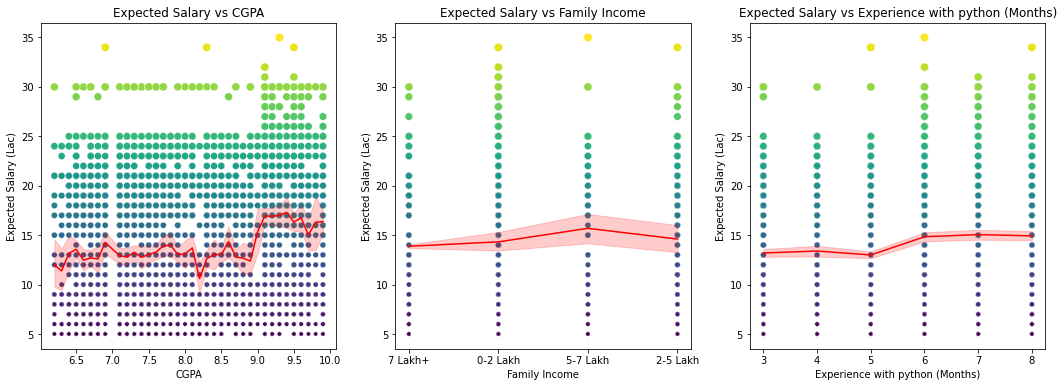

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Expected Salary vs CGPA
sns.scatterplot(data=df, x='CGPA', y='Expected salary (Lac)', hue='Expected salary (Lac)', 
                palette='viridis', size='Expected salary (Lac)', legend=False, ax=axes[0])
sns.lineplot(data=df, x='CGPA', y='Expected salary (Lac)', ax=axes[0], color='r')
axes[0].set_title('Expected Salary vs CGPA')
axes[0].set_xlabel('CGPA')
axes[0].set_ylabel('Expected Salary (Lac)')

# Plot Expected Salary vs Family Income
sns.scatterplot(data=df, x='Family Income', y='Expected salary (Lac)', hue='Expected salary (Lac)', 
                palette='viridis', size='Expected salary (Lac)', legend=False, ax=axes[1])
sns.lineplot(data=df, x=pd.Categorical(df['Family Income']).codes, y='Expected salary (Lac)', ax=axes[1], color='r')
axes[1].set_title('Expected Salary vs Family Income')
axes[1].set_xlabel('Family Income')
axes[1].set_ylabel('Expected Salary (Lac)')

# Plot Expected Salary vs Experience with python (Months)
sns.scatterplot(data=df, x='Experience with python (Months)', y='Expected salary (Lac)', hue='Expected salary (Lac)', 
                palette='viridis', size='Expected salary (Lac)', legend=False, ax=axes[2])
sns.lineplot(data=df, x='Experience with python (Months)', y='Expected salary (Lac)', ax=axes[2], color='r')
axes[2].set_title('Expected Salary vs Experience with python (Months)')
axes[2].set_xlabel('Experience with python (Months)')
axes[2].set_ylabel('Expected Salary (Lac)')

# 12. Which event tend to attract more students from specific fields of study?

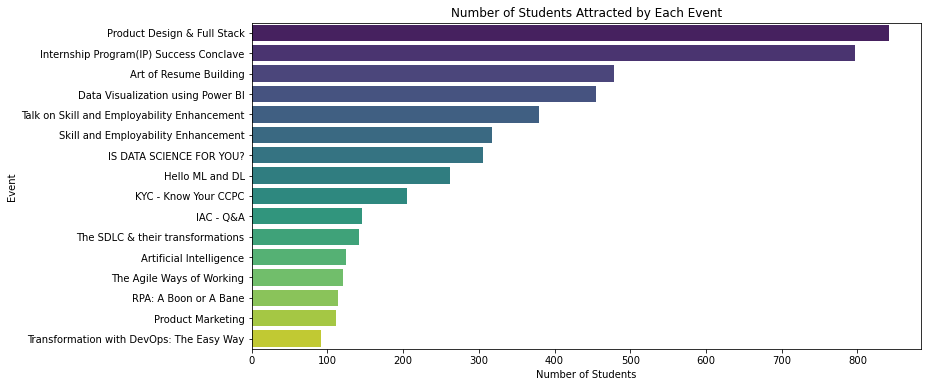

In [20]:
event_distribution = df['Events'].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=event_distribution.values, y=event_distribution.index, palette="viridis")
plt.title('Number of Students Attracted by Each Event')
plt.xlabel('Number of Students')
plt.ylabel('Event')
plt.show()

### - The graph shows that Product Design & Full Stack event tends to attract most students

# 13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

In [21]:
# Cleaning the 'Leadership- skills' column by replacing 'no ' with 'no'
df['Leadership- skills'] = df['Leadership- skills'].str.strip()

# Verifying the unique values in the 'Leadership- skills' column to ensure the cleaning was successful
df['Leadership- skills'].unique()

array(['yes', 'no'], dtype=object)

In [23]:
leadership_comparison = df.groupby('Leadership- skills').agg({'CGPA': 'mean', 'Expected salary (Lac)': 'mean'}).reset_index()
leadership_comparison

,Leadership- skills,CGPA,Expected salary (Lac)
0,no,8.039320,13.917561
1,yes,8.036787,13.971796


### - Students in leadership positions tend to have same average CGPA while having higher average Expected Salary 

# 14. How many students are graduating by the end of 2024?

In [84]:
graduates_2024 = df[df['Year of Graduation'] == 2024].shape[0]
print(f'\033[1m - Total number of students graduating by the end of 2024: {graduates_2024}')

 - Total number of students graduating by the end of 2024: 1511


# 15. Which promotion channel brings in more student participations for the event?

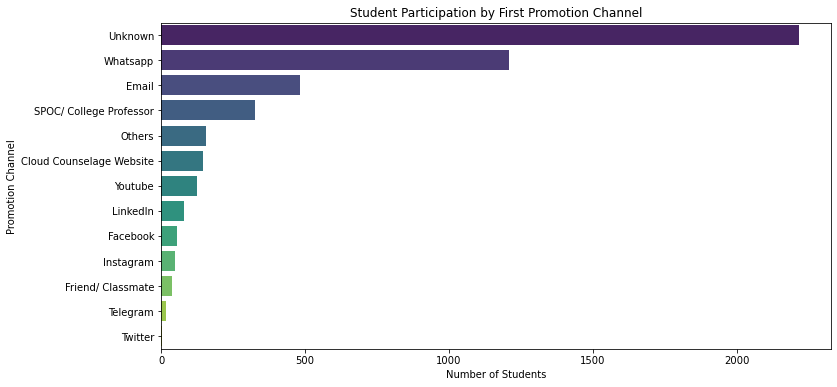

In [34]:
df['First Promotion Channel'] = df['How did you come to know about this event?'].str.split('|').str[0].str.strip()
promotion_channel_distribution = df['First Promotion Channel'].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(y=promotion_channel_distribution.index, x=promotion_channel_distribution.values, palette="viridis")
plt.title('Student Participation by First Promotion Channel')
plt.ylabel('Promotion Channel')
plt.xlabel('Number of Students')
plt.show()


### - The graph shows that Whatsapp tends to bring in more student participations for event since most of the students data for participation is not available

# 16. Find the total number of students who attended the events related to Data Science? (From all Data Science related courses.)

In [35]:
df['Events'].unique()

array(['Art of Resume Building', 'Data Visualization using Power BI',
       'Artificial Intelligence', 'Hello ML and DL', 'Product Marketing',
       'IAC - Q&A', 'Internship Program(IP) Success Conclave',
       'IS DATA SCIENCE FOR YOU?', 'KYC - Know Your CCPC',
       'Product Design & Full Stack', 'RPA: A Boon or A Bane',
       'Skill and Employability Enhancement',
       'Talk on Skill and Employability Enhancement',
       'The Agile Ways of Working', 'The SDLC & their transformations',
       'Transformation with DevOps: The Easy Way'], dtype=object)

In [85]:
# Define a list of keywords related to Data Science, AI, ML, etc.
keywords = ['Data', 'AI', 'ML', 'DL', 'Science', 'Artificial Intelligence', 'Machine Learning']

# Create a boolean mask to filter rows containing any of these keywords
data_science_events = df['Events'].apply(lambda x: any(keyword in x for keyword in keywords))

# Get the total number of students who attended these events
total_data_science_attendees = df[data_science_events].shape[0]

print(f'\033[1m - Total number of students who attended Data Science related events: {total_data_science_attendees}')

 - Total number of students who attended Data Science related events: 984


# 17. Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)

In [86]:
# Calculate average expected salary for high CGPA
high_cgpa_exp = df[df['CGPA'] > df['CGPA'].mean()]['Expected salary (Lac)'].mean()

# Calculate average expected salary for high Python experience
high_python_exp = df[df['Experience with python (Months)'] > df['Experience with python (Months)'].mean()]['Expected salary (Lac)'].mean()

# Print the results
print(f"\033[1m - Average Expected Salary for those with high CGPA: {high_cgpa_exp:.2f}")
print(f"\033[1m - Average Expected Salary for those with high Python experience: {high_python_exp:.2f}")

 - Average Expected Salary for those with high CGPA: 14.88
 - Average Expected Salary for those with high Python experience: 14.93


# 18. How many students know about the event from their colleges? Which of these Top 5 colleges?

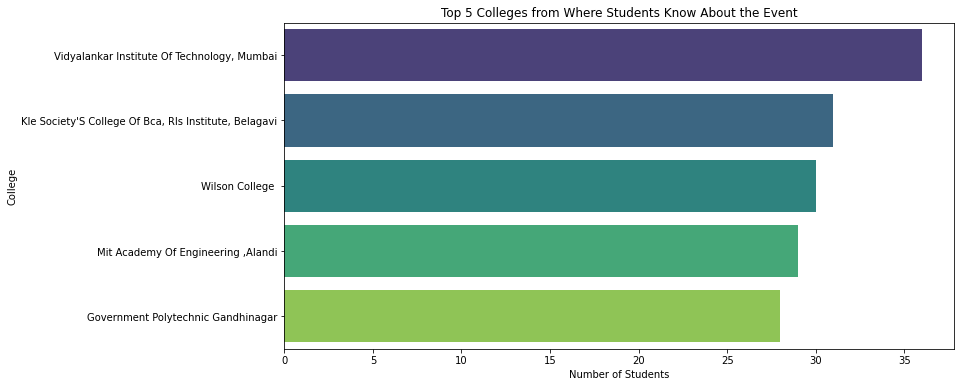

In [76]:
# Filter rows containing 'College' in the relevant columns
college_promotion = df[
    df['How did you come to know about this event?'].str.contains('College') |
    df['Specify in "Others" (how did you come to know about this event)'].str.contains('College')
]

# Get the top 5 colleges
top_5_colleges = college_promotion['College Name'].value_counts().head(5)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_colleges.values, y=top_5_colleges.index, palette="viridis")
plt.title('Top 5 Colleges from Where Students Know About the Event')
plt.ylabel('College')
plt.xlabel('Number of Students')
plt.show()

### - Top 5 colleges where students know about event from college are 'Vidyalankar Institute Of Technology, Mumbai', 'Kle Society'S College Of Bca, Rls Institute, Belagavi', 'Wilson College', 'Mit Academy Of Engineering ,Alandi', 'Government Polytechnic Gandhinagar'